In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
filePath = "/content/drive/My Drive/Yelp Project/data/"

In [0]:
import re
import pandas as pd
from datetime import datetime

### Check User Id and Business Id

In [0]:
user_id = pd.read_csv(filePath + "user_cleaned.csv", usecols=['user_id'])
business_id = pd.read_csv(filePath + "business_cleaned.csv", usecols=['business_id'])

In [0]:
def checkID(series):
    tmp = series.value_counts()
    print("unique ID: ", tmp.loc[tmp == 1].shape[0])
    print("duplicates ID: ", tmp.loc[tmp != 1].shape[0])

In [0]:
checkID(user_id['user_id'])

unique ID:  818922
duplicates ID:  0


In [0]:
checkID(business_id['business_id'])

unique ID:  158525
duplicates ID:  0


### Preprocessing Review

In [0]:
TextFileReader = pd.read_csv(filePath + 'review.csv', chunksize=100000)

dfList = []
for df in TextFileReader:
    dfList.append(df)

df = pd.concat(dfList, sort=False).reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df.head(5)

,funny,useful,review_id,text,business_id,stars,date,user_id,cool
0,1,6,Q1sbwvVQXV2734tPgoKj4Q,Total bill for this horrible service? Over $8G...,ujmEBvifdJM6h6RLv4wQIg,1.0,2013-05-07 04:34:36,hG7b0MtEbXx5QzbzE6C_VA,0
1,0,0,GJXCdrto3ASJOqKeVWPi6Q,I *adore* Travis at the Hard Rock's new Kelly ...,NZnhc2sEQy3RmzKTZnqtwQ,5.0,2017-01-14 21:30:33,yXQM5uF2jS6es16SJzNHfg,0
2,0,3,2TzJjDVDEuAW6MR5Vuc1ug,I have to say that this office really has it t...,WTqjgwHlXbSFevF32_DJVw,5.0,2016-11-09 20:09:03,n6-Gk65cPZL6Uz8qRm3NYw,0
3,0,0,yi0R0Ugj_xUx_Nek0-_Qig,Went in for a lunch. Steak sandwich was delici...,ikCg8xy5JIg_NGPx-MSIDA,5.0,2018-01-09 20:56:38,dacAIZ6fTM6mqwW5uxkskg,0
4,0,7,11a8sVPMUFtaC7_ABRkmtw,Today was my second out of three sessions I ha...,b1b1eb3uo-w561D0ZfCEiQ,1.0,2018-01-30 23:07:38,ssoyf2_x0EQMed6fgHeMyQ,0


In [0]:
df.tail()

,funny,useful,review_id,text,business_id,stars,date,user_id,cool
6685895,0,1,0pCaq1hqAViS2N6ldlp_sQ,I have been coming here for years and this pla...,RXBFk3tVBxiTf3uOt9KExQ,5.0,2018-07-03 12:17:27,Xu_YazIajfsc7SRj1wJ6Mg,0
6685896,11,13,jPCXuSBbI_cPocgoNBhdkg,I think this owner and the owner of Amy's Baki...,yA6dKNm_zl1ucZCnwW8ZCg,1.0,2013-05-22 15:32:08,V6BjjQICDO4q7TT3ZhaPWw,5
6685897,0,0,zwzO3yPdGbdgGy3-XQ0SWg,"Off the grid Mexican in Vegas. Very tasty, qua...",a192hdM0_UVCYLwPJv1Qwg,5.0,2018-11-13 21:15:20,PFiIECX8wuvi7P-1mCvIjA,0
6685898,1,1,o8Nc2BJhKJXM6tRHJDRuPA,We hired Taco Naco to cater our family party a...,kOo4ZY2UQAX4j312mzQ8mA,5.0,2018-08-13 18:09:16,wu5R5_N7q5iqCBh6NBX26Q,1
6685899,0,2,OKmOLFwtI-NjofTHAGzv1Q,Having just come back from Hawaii a few months...,PkqN5st3zZ_Xce_5QlBtNQ,3.0,2018-11-12 20:25:32,Ej3mCvjcwVXCSPB_avIfjQ,0


In [0]:
print(df.shape)
df.describe()

(6685900, 9)


,funny,useful,stars,cool
count,6.685900e+06,6.685900e+06,6.685900e+06,6.685900e+06
mean,4.827667e-01,1.354134e+00,3.716199e+00,5.787708e-01
std,2.378646e+00,3.700192e+00,1.463643e+00,2.359024e+00
min,0.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,0.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00
max,1.290000e+03,1.241000e+03,5.000000e+00,5.060000e+02


In [0]:
df.dtypes

funny                   int64
useful                  int64
review_id              object
text                   object
business_id            object
stars                 float64
date           datetime64[ns]
user_id                object
cool                    int64
dtype: object

### Check NaNs

In [0]:
df.loc[ df.isnull().any(axis=1) ]

,funny,useful,review_id,text,business_id,stars,date,user_id,cool
3427823,2,7,hpY467Acucmh3tCmEYGiDw,NaN,I7XWtKL1oHohZCtCCyQIog,1.0,2014-11-15 21:14:34,pUKAjAaSMkxiJ1WCIFSsBQ,1
6334066,0,0,iHdxK8lwkYn0rlNh-REuGQ,NaN,oXoVJ0xKv82cBo9U6oEjlQ,3.0,2014-12-26 08:32:06,v3DIq18Z30KNwyUvBXtXEA,0


In [0]:
df['text'] = df['text'].fillna("")

In [0]:
df.loc[ df.isnull().any(axis=1) ]

,funny,useful,review_id,text,business_id,stars,date,user_id,cool


### String Preprocessing

In [0]:
def convertStr(x):
    try:
        return re.sub('\s+', ' ', x)
    except:
        print(x)
        return x
df['text'] = df['text'].apply(lambda x: convertStr(x))
df.loc[2823429]['text']

'Working with Tina and Marcia has been such a pleasure! My husband and I had not purchased a home before and we definitely needed some hand holding. They were patient and professional. We got our dream home and the entire experience was awesome! Thank you so much ladies for a job well done!'

### Check Duplicates

In [0]:
print(df.shape)

# check if there is any duplicate records
print(df.drop_duplicates().shape)

# confirm every users only rate each store once
print(df[['user_id', 'business_id']].drop_duplicates().shape)

(6685900, 9)
(6685900, 9)
(6461396, 2)


In [0]:
duplicatesDF = df.loc[ df[['user_id', 'business_id']].duplicated(keep=False) ]
duplicatesDF.sort_values(by=['user_id', 'business_id'])

,funny,useful,review_id,text,business_id,stars,date,user_id,cool
5178360,0,0,O_QYywGbyF18KLePM6TSaA,"I like it, and so far I think it is one of the...",5cbsjFtrntUAeUx51FaFTg,4.0,2008-11-11 04:31:46,---1lKK3aKOuomHnwAkAow,0
5194894,0,1,12_4xbZupkMox3adrUCwwA,So I was coming here once a month or so maybe ...,5cbsjFtrntUAeUx51FaFTg,1.0,2010-11-05 22:12:55,---1lKK3aKOuomHnwAkAow,0
3928452,0,0,wEJK2PeiS6Au0TOyxTyqUA,The customer service of the owner made me give...,Hqs4YNST_ZHbshwyi4bnsQ,5.0,2018-10-11 23:29:57,---1lKK3aKOuomHnwAkAow,4
3952289,0,0,G2cGRh-mbojvqDl36YkodA,I used to drive from summerlin to go here beca...,Hqs4YNST_ZHbshwyi4bnsQ,1.0,2018-10-07 15:21:55,---1lKK3aKOuomHnwAkAow,0
5530213,0,1,u_GWsHysj-wCh1IJZoV45A,This is the new name for Cafe Blue and I have ...,WOO81gScY3_VpaIfXFAKpw,4.0,2010-12-02 01:37:12,---1lKK3aKOuomHnwAkAow,0
...,...,...,...,...,...,...,...,...,...
3955082,0,0,8hornGw7ltftSeHp1s_T0A,I'll try to be as objective as possible due to...,AO_Y_3YjsL5EuyGexZTwcQ,1.0,2017-06-05 22:30:03,zzvNWOF7ZTjzqc6b1hxjcA,0
4980631,0,0,_htR70NBrPuJ5sQzm-RAkw,Went in for lunch and had the caprese panini. ...,1hfYBwAI7pFz50l5n4JpqQ,5.0,2018-07-22 16:42:02,zzw0Z6-_VDp9ShIRSKIsQw,0
5050750,0,0,oOY-s0mObG9W5UV2X9MbTA,Went in for lunch and had the caprese panini. ...,1hfYBwAI7pFz50l5n4JpqQ,4.0,2018-02-07 14:59:59,zzw0Z6-_VDp9ShIRSKIsQw,0
5378692,0,0,pM_XKaaCbYSikfeKr3rRmQ,Went back to TAO with two of my girlfriends an...,ECOkEVUodMLUxvI0PMI4gQ,5.0,2010-10-10 05:08:16,zzwP9jh8_W0RhemlxCv_1g,0


In [0]:
df.sort_values(by='date', inplace=True)
df.head()

,funny,useful,review_id,text,business_id,stars,date,user_id,cool
5348834,0,1,_CRpX4FGBkxie_1q0-DbjQ,Hole in the wall burrito joint with the BEST b...,PD2MAlYYi9HCqPH7IBKwTg,5.0,2004-10-12 10:13:32,sE3ge33huDcNJGW3V4obww,1
2661601,3,5,xW294l3Lwh0cxlHU1jwRDA,The gold standard for casinos everywhere. Just...,na4Th5DrNauOv-c43QQFvA,5.0,2004-10-19 02:46:40,nkN_do3fJ9xekchVC-v68A,5
1217,0,0,0O7kc-T1SrZpF84jMOyeOg,"New club in the Hard Rock, and currently the h...",GCRvrxMSC1nzShyM4Y-guQ,5.0,2004-10-19 03:05:42,yYSBB5q7bY-qSVvmMgk4FA,0
5350697,0,2,JDBubAcRw4FXfg1c5xk-dA,Best pizza I've ever had. My favorite is the (...,u8C8pRvaHXg3PgDrsUHJHQ,5.0,2004-10-19 09:07:15,c6HT44PKCaXqzN_BdgKPCw,0
5345272,1,0,0QHCY_55TFHHvyumEMpDew,Good stuff. Pricey by normal pizza standards.,u8C8pRvaHXg3PgDrsUHJHQ,4.0,2004-10-19 19:24:13,nkN_do3fJ9xekchVC-v68A,0


In [0]:
df.drop_duplicates(subset=['user_id', 'business_id'], keep='last', inplace=True)
df.reset_index(drop=True, inplace=True)

In [0]:
print(df.shape)
print(df[['user_id', 'business_id']].drop_duplicates().shape)

(6461396, 9)
(6461396, 2)


In [0]:
df.loc[ 
    df[['user_id', 'business_id']].duplicated(keep=False)
].sort_values(by=['user_id', 'business_id'])

,funny,useful,review_id,text,business_id,stars,date,user_id,cool


In [0]:
df.loc[df['business_id'] == '5cbsjFtrntUAeUx51FaFTg']\
  .loc[df['user_id'] == '---1lKK3aKOuomHnwAkAow']

,funny,useful,review_id,text,business_id,stars,date,user_id,cool
322075,0,1,12_4xbZupkMox3adrUCwwA,So I was coming here once a month or so maybe ...,5cbsjFtrntUAeUx51FaFTg,1.0,2010-11-05 22:12:55,---1lKK3aKOuomHnwAkAow,0


In [0]:
df.head()

,funny,useful,review_id,text,business_id,stars,date,user_id,cool
0,0,1,_CRpX4FGBkxie_1q0-DbjQ,Hole in the wall burrito joint with the BEST b...,PD2MAlYYi9HCqPH7IBKwTg,5.0,2004-10-12 10:13:32,sE3ge33huDcNJGW3V4obww,1
1,3,5,xW294l3Lwh0cxlHU1jwRDA,The gold standard for casinos everywhere. Just...,na4Th5DrNauOv-c43QQFvA,5.0,2004-10-19 02:46:40,nkN_do3fJ9xekchVC-v68A,5
2,0,0,0O7kc-T1SrZpF84jMOyeOg,"New club in the Hard Rock, and currently the h...",GCRvrxMSC1nzShyM4Y-guQ,5.0,2004-10-19 03:05:42,yYSBB5q7bY-qSVvmMgk4FA,0
3,0,2,JDBubAcRw4FXfg1c5xk-dA,Best pizza I've ever had. My favorite is the (...,u8C8pRvaHXg3PgDrsUHJHQ,5.0,2004-10-19 09:07:15,c6HT44PKCaXqzN_BdgKPCw,0
4,1,0,0QHCY_55TFHHvyumEMpDew,Good stuff. Pricey by normal pizza standards.,u8C8pRvaHXg3PgDrsUHJHQ,4.0,2004-10-19 19:24:13,nkN_do3fJ9xekchVC-v68A,0


### Filtering Out reviews that are not qualified

In [0]:
rr = df.loc[
    df['business_id'].isin(business_id['business_id'].values.tolist()) &\
    df['user_id'].isin(user_id['user_id'].values.tolist())
]

In [0]:
print(rr.shape)
rr.dtypes

(4515594, 9)


funny                   int64
useful                  int64
review_id              object
text                   object
business_id            object
stars                 float64
date           datetime64[ns]
user_id                object
cool                    int64
dtype: object

In [0]:
rr.head()

,funny,useful,review_id,text,business_id,stars,date,user_id,cool
1,3,5,xW294l3Lwh0cxlHU1jwRDA,The gold standard for casinos everywhere. Just...,na4Th5DrNauOv-c43QQFvA,5.0,2004-10-19 02:46:40,nkN_do3fJ9xekchVC-v68A,5
3,0,2,JDBubAcRw4FXfg1c5xk-dA,Best pizza I've ever had. My favorite is the (...,u8C8pRvaHXg3PgDrsUHJHQ,5.0,2004-10-19 09:07:15,c6HT44PKCaXqzN_BdgKPCw,0
4,1,0,0QHCY_55TFHHvyumEMpDew,Good stuff. Pricey by normal pizza standards.,u8C8pRvaHXg3PgDrsUHJHQ,4.0,2004-10-19 19:24:13,nkN_do3fJ9xekchVC-v68A,0
5,0,0,1Iobyi_7BkFON25Oegs0aw,Love their subs. Cheap and top shelf ingredients.,EZOoB2D8uQHV_gJoGCMTxQ,4.0,2004-10-19 21:33:08,nkN_do3fJ9xekchVC-v68A,0
6,0,0,2F5J51OYtD49eyIUKJKVgg,Love their pizza. They used to have a great ta...,oYMsq2Xvzw6UbrIlMWjb-A,4.0,2004-10-19 21:34:40,nkN_do3fJ9xekchVC-v68A,0


(9022,)


Text(0.5, 0, 'id')

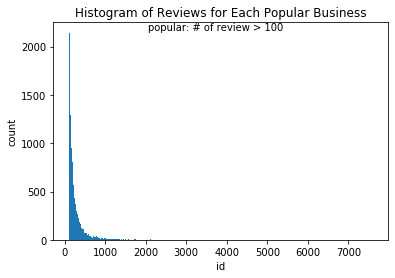

In [0]:
import matplotlib.pyplot as plt
b_count = rr.business_id.value_counts()
print(b_count.loc[b_count > 100].shape)
plt.hist(b_count.loc[b_count > 100], bins=300)
plt.title("Histogram of Reviews for Each Popular Business")
plt.suptitle("popular: # of review > 100", y=0.88, fontsize='medium')
plt.ylabel('count')
plt.xlabel('id')

In [0]:
# the percentage of popular business reviews among all reviews
b_count.loc[b_count > 100].sum() / b_count.sum()

0.552023941922148

(69381,)


Text(0.5, 0, 'id')

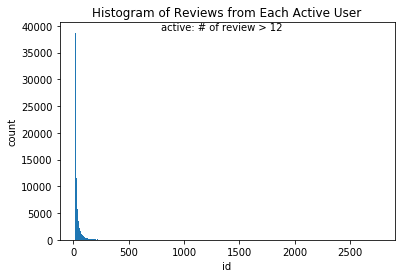

In [0]:
u_count = rr.user_id.value_counts()
print(u_count.loc[u_count > 12].shape)
plt.hist(u_count.loc[u_count > 12], bins=300)
plt.title("Histogram of Reviews from Each Active User")
plt.suptitle("active: # of review > 12", y=0.88, fontsize='medium')
plt.ylabel('count')
plt.xlabel('id')

In [0]:
# the percentage of active users review among all reviews
u_count.loc[u_count > 12].sum() / u_count.sum()

0.5139527601462842

In [0]:
pop_busi = b_count.loc[b_count > 100].index.tolist()
act_user = u_count.loc[u_count > 12].index.tolist()

In [0]:
from datetime import datetime
date_after = datetime.strptime('2017-01-01', "%Y-%m-%d")
date_after

datetime.datetime(2017, 1, 1, 0, 0)

In [0]:
result = rr.loc[rr['date'] >= date_after]\
           .loc[rr['business_id'].isin(pop_busi)]\
           .loc[rr['user_id'].isin(act_user)]
print(result.shape)
result['date'].sort_values().iloc[[0,1,2,-3,-2,-1]]

(392471, 9)


4123706   2017-01-01 00:00:05
4123714   2017-01-01 00:02:38
4123717   2017-01-01 00:03:16
6461368   2018-11-14 18:05:34
6461370   2018-11-14 18:06:13
6461385   2018-11-14 18:09:01
Name: date, dtype: datetime64[ns]

In [0]:
print(result['business_id'].nunique())
print(result['user_id'].nunique())

9017
48644


In [0]:
result.dtypes

funny                   int64
useful                  int64
review_id              object
text                   object
business_id            object
stars                 float64
date           datetime64[ns]
user_id                object
cool                    int64
dtype: object

In [0]:
print(result.shape)
result.describe()

(392471, 9)


,funny,useful,stars,cool
count,392471.000000,392471.000000,392471.000000,392471.000000
mean,0.672011,1.631940,3.922287,1.093908
std,3.102452,5.163437,1.223247,4.589627
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000
50%,0.000000,0.000000,4.000000,0.000000
75%,0.000000,1.000000,5.000000,1.000000
max,187.000000,358.000000,5.000000,347.000000


In [0]:
result.to_csv(filePath + "review_cleaned.csv", index=True)

### Train / Test Set Labeling

In [0]:
import pandas as pd
t = pd.read_csv(filePath + 'review_cleaned.csv', index_col=0)

In [0]:
t.head()

,funny,useful,review_id,text,business_id,stars,date,user_id,cool
4123706,0,0,Mw89_xzMrWBPZJJkdGbnAA,Poor customer service. The only I gave this pl...,gBfPyzPRmeOaj3SdcIj0Rw,2.0,2017-01-01 00:00:05,BKcmc3Rj6L1EHeou_07IUw,0
4123714,0,2,B55t0ioeFWWSlAQX4-0Q9Q,Came for brunch after hearing great reviews on...,xBgQ4T6mhS5VsmK9u6mBcg,4.0,2017-01-01 00:02:38,p4WztGxrJBrVWmt-xmY5Fg,0
4123717,0,2,OLeTF2dkoqeHo7qaErl2VA,We visited BWW to view the UFC 207 fight. This...,v8QuF4YX9Bb-qEtKLVPrmA,4.0,2017-01-01 00:03:16,8z-gipHHulR2HAeAE3pWpw,2
4123718,4,1,GUsBYum0YCipOJ3HNyZ37g,Can't wait until I am 60 then I will get a car...,gjzQoi1AkRxYRl8-dFGGPQ,4.0,2017-01-01 00:04:18,xRpAEg0M0azAPuKVg7WtgA,1
4123724,0,0,-BlhsXgJFd8bd3_y71CkDw,I just love Nothing Bundt Cakes. They created ...,Ay7SK-nziJ7hnf6V_z6saA,5.0,2017-01-01 00:05:19,KCcGBudPGBLoviv5BbPiXQ,0


In [0]:
t['date'] = pd.to_datetime(t['date'], format='%Y-%m-%d %H:%M:%S')
t['date'].head()

4123706   2017-01-01 00:00:05
4123714   2017-01-01 00:02:38
4123717   2017-01-01 00:03:16
4123718   2017-01-01 00:04:18
4123724   2017-01-01 00:05:19
Name: date, dtype: datetime64[ns]

In [0]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392471 entries, 4123706 to 6461385
Data columns (total 9 columns):
funny          392471 non-null int64
useful         392471 non-null int64
review_id      392471 non-null object
text           392471 non-null object
business_id    392471 non-null object
stars          392471 non-null float64
date           392471 non-null datetime64[ns]
user_id        392471 non-null object
cool           392471 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 29.9+ MB


In [0]:
list(sorted(t.funny.value_counts().index.values.tolist()))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 86,
 90,
 91,
 95,
 100,
 101,
 106,
 108,
 109,
 113,
 122,
 140,
 141,
 145,
 156,
 158,
 159,
 169,
 178,
 179,
 181,
 183,
 185,
 187]

In [0]:
t.loc[t.isnull().any(axis=1)]

,funny,useful,review_id,text,business_id,stars,date,user_id,cool


### Find out the last comment for each user

In [0]:
lastComment = t.sort_values(by='date')\
               .groupby(['user_id'])\
               .agg({'date': 'last'})\
               .reset_index()

lastComment.head()

,user_id,date
0,---1lKK3aKOuomHnwAkAow,2018-10-11 23:29:57
1,--2HUmLkcNHZp0xw6AMBPg,2018-09-23 19:44:28
2,--2vR0DIsmQ6WfcSzKWigw,2018-01-11 04:24:17
3,--4rAAfZnEIAKJE80aIiYg,2018-11-12 20:37:07
4,--BumyUHiO_7YsHurb9Hkw,2018-08-27 01:26:21


In [0]:
print(lastComment.shape)

(48644, 2)


In [0]:
t.set_index(['user_id', 'date'], inplace=True)
t.head()

,,funny,useful,review_id,text,business_id,stars,cool
user_id,date,,,,,,,
BKcmc3Rj6L1EHeou_07IUw,2017-01-01 00:00:05,0,0,Mw89_xzMrWBPZJJkdGbnAA,Poor customer service. The only I gave this pl...,gBfPyzPRmeOaj3SdcIj0Rw,2.0,0
p4WztGxrJBrVWmt-xmY5Fg,2017-01-01 00:02:38,0,2,B55t0ioeFWWSlAQX4-0Q9Q,Came for brunch after hearing great reviews on...,xBgQ4T6mhS5VsmK9u6mBcg,4.0,0
8z-gipHHulR2HAeAE3pWpw,2017-01-01 00:03:16,0,2,OLeTF2dkoqeHo7qaErl2VA,We visited BWW to view the UFC 207 fight. This...,v8QuF4YX9Bb-qEtKLVPrmA,4.0,2
xRpAEg0M0azAPuKVg7WtgA,2017-01-01 00:04:18,4,1,GUsBYum0YCipOJ3HNyZ37g,Can't wait until I am 60 then I will get a car...,gjzQoi1AkRxYRl8-dFGGPQ,4.0,1
KCcGBudPGBLoviv5BbPiXQ,2017-01-01 00:05:19,0,0,-BlhsXgJFd8bd3_y71CkDw,I just love Nothing Bundt Cakes. They created ...,Ay7SK-nziJ7hnf6V_z6saA,5.0,0


In [0]:
# t.index.get_level_values('user_id').get_duplicates()
# t.loc[t.index.duplicated()].loc["BcpaxCEd9vfRZZTKEgH5iQ"]

### Labelling Train/Test (Train: 1, Test: 0)

In [0]:
t['TrainTest'] = "1"
t.head()

,,funny,useful,review_id,text,business_id,stars,cool,TrainTest
user_id,date,,,,,,,,
BKcmc3Rj6L1EHeou_07IUw,2017-01-01 00:00:05,0,0,Mw89_xzMrWBPZJJkdGbnAA,Poor customer service. The only I gave this pl...,gBfPyzPRmeOaj3SdcIj0Rw,2.0,0,1
p4WztGxrJBrVWmt-xmY5Fg,2017-01-01 00:02:38,0,2,B55t0ioeFWWSlAQX4-0Q9Q,Came for brunch after hearing great reviews on...,xBgQ4T6mhS5VsmK9u6mBcg,4.0,0,1
8z-gipHHulR2HAeAE3pWpw,2017-01-01 00:03:16,0,2,OLeTF2dkoqeHo7qaErl2VA,We visited BWW to view the UFC 207 fight. This...,v8QuF4YX9Bb-qEtKLVPrmA,4.0,2,1
xRpAEg0M0azAPuKVg7WtgA,2017-01-01 00:04:18,4,1,GUsBYum0YCipOJ3HNyZ37g,Can't wait until I am 60 then I will get a car...,gjzQoi1AkRxYRl8-dFGGPQ,4.0,1,1
KCcGBudPGBLoviv5BbPiXQ,2017-01-01 00:05:19,0,0,-BlhsXgJFd8bd3_y71CkDw,I just love Nothing Bundt Cakes. They created ...,Ay7SK-nziJ7hnf6V_z6saA,5.0,0,1


In [0]:
t['TrainTest'].loc[list(lastComment.itertuples(index=False, name=None))] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
t.reset_index(inplace=True)
t['user_id'].nunique()

48644

In [0]:
t['TrainTest'].value_counts()

1    343827
0     48644
Name: TrainTest, dtype: int64

In [0]:
t.head()

,user_id,date,funny,useful,review_id,text,business_id,stars,cool,TrainTest
0,BKcmc3Rj6L1EHeou_07IUw,2017-01-01 00:00:05,0,0,Mw89_xzMrWBPZJJkdGbnAA,Poor customer service. The only I gave this pl...,gBfPyzPRmeOaj3SdcIj0Rw,2.0,0,1
1,p4WztGxrJBrVWmt-xmY5Fg,2017-01-01 00:02:38,0,2,B55t0ioeFWWSlAQX4-0Q9Q,Came for brunch after hearing great reviews on...,xBgQ4T6mhS5VsmK9u6mBcg,4.0,0,1
2,8z-gipHHulR2HAeAE3pWpw,2017-01-01 00:03:16,0,2,OLeTF2dkoqeHo7qaErl2VA,We visited BWW to view the UFC 207 fight. This...,v8QuF4YX9Bb-qEtKLVPrmA,4.0,2,1
3,xRpAEg0M0azAPuKVg7WtgA,2017-01-01 00:04:18,4,1,GUsBYum0YCipOJ3HNyZ37g,Can't wait until I am 60 then I will get a car...,gjzQoi1AkRxYRl8-dFGGPQ,4.0,1,1
4,KCcGBudPGBLoviv5BbPiXQ,2017-01-01 00:05:19,0,0,-BlhsXgJFd8bd3_y71CkDw,I just love Nothing Bundt Cakes. They created ...,Ay7SK-nziJ7hnf6V_z6saA,5.0,0,1


In [0]:
t.to_csv(filePath + 'review_cleaned_withTrainTest.csv', index=False)

### Extract User-Business Rating Matrix

In [0]:
columns = ['business_id', 'user_id', 'stars', 'date', 'TrainTest']
t[columns].head()

,business_id,user_id,stars,date,TrainTest
0,gBfPyzPRmeOaj3SdcIj0Rw,BKcmc3Rj6L1EHeou_07IUw,2.0,2017-01-01 00:00:05,1
1,xBgQ4T6mhS5VsmK9u6mBcg,p4WztGxrJBrVWmt-xmY5Fg,4.0,2017-01-01 00:02:38,1
2,v8QuF4YX9Bb-qEtKLVPrmA,8z-gipHHulR2HAeAE3pWpw,4.0,2017-01-01 00:03:16,1
3,gjzQoi1AkRxYRl8-dFGGPQ,xRpAEg0M0azAPuKVg7WtgA,4.0,2017-01-01 00:04:18,1
4,Ay7SK-nziJ7hnf6V_z6saA,KCcGBudPGBLoviv5BbPiXQ,5.0,2017-01-01 00:05:19,1


In [0]:
ratings = t[columns]
ratings.loc[ratings.isnull().any(axis=1)]

,business_id,user_id,stars,date,TrainTest


In [0]:
ratings.to_csv(filePath + 'yelp_ratings.csv', index=False)

In [0]:
print("(row, column)", ratings.shape)
print("unique business id: ", ratings['business_id'].nunique())
print("unique user id: ", ratings['user_id'].nunique())
ratings['TrainTest'].value_counts()

(row, column) (392471, 5)
unique business id:  9017
unique user id:  48644


1    343827
0     48644
Name: TrainTest, dtype: int64

### Sparsity

In [0]:
ratings.head(1)

,business_id,user_id,stars,date,TrainTest
0,gBfPyzPRmeOaj3SdcIj0Rw,BKcmc3Rj6L1EHeou_07IUw,2.0,2017-01-01 00:00:05,1


In [0]:
nom = ratings.shape[0]
denom = ratings['business_id'].nunique() * ratings['user_id'].nunique()
print("sparsity: %s" % (1 - nom/denom))

sparsity: 0.9991052200944124
